<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-02.-Tokens-and-N-Grams" data-toc-modified-id="Week-02.-Tokens-and-N-Grams-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 02. Tokens and N-Grams</a></span></li><li><span><a href="#Basic-Pre-Processing-and-Tokenization" data-toc-modified-id="Basic-Pre-Processing-and-Tokenization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Pre-Processing and Tokenization</a></span><ul class="toc-item"><li><span><a href="#Tagging-Parts-of-Speech" data-toc-modified-id="Tagging-Parts-of-Speech-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tagging Parts of Speech</a></span></li></ul></li><li><span><a href="#Corpus-Prep-with-spaCy" data-toc-modified-id="Corpus-Prep-with-spaCy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Corpus Prep with spaCy</a></span></li><li><span><a href="#N-grams" data-toc-modified-id="N-grams-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>N-grams</a></span></li><li><span><a href="#Tokenizers" data-toc-modified-id="Tokenizers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tokenizers</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Sentencepiece-Tokenization" data-toc-modified-id="Sentencepiece-Tokenization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sentencepiece Tokenization</a></span></li>
<li><span><a href="#Parsing" data-toc-modified-id="Parsing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Parsing</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Dependency-Parsing-with-SpaCy" data-toc-modified-id="Dependency-Parsing-with-SpaCy-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Dependency Parsing with SpaCy</a></span></li></ul></li>
<li><span><a href="#Constituency-Parsing-with-SpaCy" data-toc-modified-id="Constituency-Parsing-with-SpaCy-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Constituency Parsing with SpaCy</a></span></li>
<li><span><a href="#Application" data-toc-modified-id="Application-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Application</a></span></li>
</ul></div>

# Week 02. Tokens and N-Grams

Natural Language Processing for Law and Social Science<br>
Elliott Ash, ETH Zurich

In [2]:
# set random seed
import numpy as np
np.random.seed(4)

In [3]:
#setup
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import pandas as pd
import nltk

In [4]:
# If you are using Google Colab, here's the code to load sc_cases_cleaned.pkl from local. 
from google.colab import files
uploaded = files.upload()

Saving sc_cases_cleaned.pkl to sc_cases_cleaned.pkl


In [5]:
# load cleaned data from lesson 1.
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df.columns

Index(['case_name', 'opinion_type', 'date_standard', 'authorship',
       'x_republican', 'maj_judges', 'dissent_judges', 'topic_id',
       'cite_count', 'opinion_text', 'year', 'log_cite_count'],
      dtype='object')

# Basic Pre-Processing and Tokenization

In [6]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [7]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [10]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [16]:
# 
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [21]:
# Capitalization
text_lower = text.lower() # go to lower-case

In [22]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
print ("punctuation:", punctuation)
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
prof zurich hailed from zurich she got 3 mas from eth


In [23]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [24]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [25]:
# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
print ("stop words:", stoplist)
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# scikit-learn stopwords
# depending on sklearn version, for sklearn==0.24.1, stop_words are here
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS as stop_words
sorted(list(stop_words))[:20]

# in older versions, one may have to import it like this
# from sklearn.feature_extraction import stop_words
# sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [27]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [28]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in tokens]
print(tokens_stemmed)

['prof', 'zurich', 'hail', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [29]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [30]:
# Lemmatizing
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
wnl.lemmatize('corporation'), wnl.lemmatize('corporations')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


('corporation', 'corporation')

Let's wrap it into a recipe.

In [31]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the Supreme Court Cases Corpus.

In [32]:
df['tokens_cleaned'] = df['opinion_text'].apply(normalize_text)
df['tokens_cleaned']

0      [justic, ginsburg, deliv, opinion, court, moti...
1      [justic, steven, deliv, opinion, court, unit, ...
2      [justic, oconnor, deliv, opinion, court, confr...
4      [justic, kennedi, deliv, opinion, court, state...
5      [justic, kennedi, deliv, opinion, court, case,...
                             ...                        
815    [justic, breyer, deliv, opinion, court, appeal...
816    [justic, souter, deliv, opinion, court, questi...
817    [justic, scalia, deliv, opinion, court, case, ...
818    [justic, thoma, deliv, opinion, court, control...
819    [justic, oconnor, deliv, opinion, courtthi, ca...
Name: tokens_cleaned, Length: 768, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [33]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [34]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the Supreme Court corpus.

In [35]:
df['tokens_simple'] = df['opinion_text'].apply(simple_preprocess)
df['tokens_simple']

0      [justice, ginsburg, delivered, the, opinion, o...
1      [justice, stevens, delivered, the, opinion, of...
2      [justice, connor, delivered, the, opinion, of,...
4      [justice, kennedy, delivered, the, opinion, of...
5      [justice, kennedy, delivered, the, opinion, of...
                             ...                        
815    [justice, breyer, delivered, the, opinion, of,...
816    [justice, souter, delivered, the, opinion, of,...
817    [justice, scalia, delivered, the, opinion, of,...
818    [justice, thomas, delivered, the, opinion, of,...
819    [justice, connor, delivered, the, opinion, of,...
Name: tokens_simple, Length: 768, dtype: object

## Tagging Parts of Speech

In [36]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives over time.

<AxesSubplot:xlabel='year'>

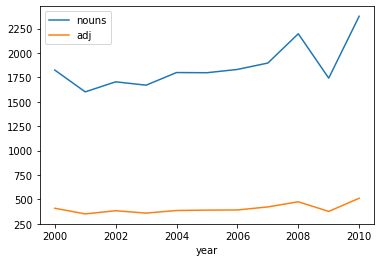

In [37]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N'])
    num_adj = len([t for t in tags if t[0] == 'J'])
    return num_nouns, num_adj

df['nouns'], df['adj'] = zip(*df['opinion_text'].map(get_nouns_adj))
df.groupby('year')[['nouns','adj']].mean().plot()

In [38]:
# Get list of nouns, adjectives, and verbs from WordNet
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn

nouns = set([x.lemma_names()[0].lower() 
             for x in wn.all_synsets('n')])

adjectives = set([x.lemma_names()[0].lower() 
             for x in wn.all_synsets('a')])

verbs = set([x.lemma_names()[0].lower() 
             for x in wn.all_synsets('v')])

In [40]:
for i, n in enumerate(nouns):
  print (n)
  if i >= 10:
    break

tastefulness
pitching_wedge
disagreement
genus_sivapithecus
bell_tower
revel
coragyps
error
ameiuridae
pop_art
rotogravure


# Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [17]:
dfs = df.sample(10)
dfs['doc'] = dfs['opinion_text'].apply(nlp)

In [18]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[1]
sent1 # sentence

The Railroad Revitalization and Regulatory Reform Act of 1976 prohibits States from discriminating against railroads by taxing railroad property more heavily than other commercial property in the State.  

In [19]:
# tokens
list(sent1) 

[The,
 Railroad,
 Revitalization,
 and,
 Regulatory,
 Reform,
 Act,
 of,
 1976,
 prohibits,
 States,
 from,
 discriminating,
 against,
 railroads,
 by,
 taxing,
 railroad,
 property,
 more,
 heavily,
 than,
 other,
 commercial,
 property,
 in,
 the,
 State,
 .,
  ]

In [ ]:
# lemmas
[x.lemma_ for x in sent1]

['the',
 'Bankruptcy',
 'Code',
 'provide',
 'a',
 'stamp',
 '-',
 'tax',
 'exemption',
 'for',
 'any',
 'asset',
 'transfer',
 '"',
 'under',
 'a',
 'plan',
 'confirm',
 'under',
 '[',
 'chapter',
 '11',
 ']',
 '"',
 'of',
 'the',
 'Code',
 '.',
 ' ']

In [ ]:
# POS tags
[x.tag_ for x in sent1]

['DT',
 'NNP',
 'NNP',
 'VBZ',
 'DT',
 'NN',
 'HYPH',
 'NN',
 'NN',
 'IN',
 'DT',
 'NN',
 'NN',
 '``',
 'IN',
 'DT',
 'NN',
 'VBN',
 'IN',
 '-LRB-',
 'NN',
 'CD',
 '-RRB-',
 "''",
 'IN',
 'DT',
 'NNP',
 '.',
 '_SP']

Analyzing a Corpus with spaCy data

In [41]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_sents'] = dfs['doc'].apply(lambda x: len(list(x.sents)))


print(len(tokens),'words in corpus.')
words_per_sent = len(tokens) / len(sentences)
print(words_per_sent,'words per sentence.')

35 words in corpus.
17.5 words per sentence.


**pre-processing with spacy**

In [42]:
def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit]
tokenize(text, nlp)

['science',
 'solve',
 'ultimate',
 'mystery',
 'nature',
 'analysis',
 'mystery',
 'try',
 'solve']

# N-grams

In [43]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['opinion_text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 2503),
 (('l.', 'ed.'), 2197),
 (('s.', 'ct.'), 1898),
 (('ed.', '2d'), 1618),
 (('l.', 'ed.', '2d'), 1618),
 (('that', 'the'), 1200),
 (('to', 'the'), 1077),
 (('in', 'the'), 951)]

# Tokenizers

In [44]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 398),
 ('of', 295),
 ('to', 148),
 ('a', 126),
 ('that', 110),
 ('supervised', 95),
 ('and', 78),
 ('in', 76),
 ('release', 71),
 ('is', 65),
 ('term', 64),
 ('§', 56),
 ('v.', 49),
 ('for', 45),
 ('at', 43),
 ('united', 42),
 ('not', 41),
 ('it', 41),
 ('states', 38),
 ('as', 38)]

Usually we use scikit-learn's vectorizer.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['opinion_text'])

# save the vectors
pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [46]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['opinion_text'])
pd.to_pickle(X_tfidf,'X_tfidf.pkl')

# save from colab to local:
# from google.colab import files
# files.download("X.pkl")
# files.download("vec-3grams-1.pkl")
# files.download("X_tfidf.pkl")

**Make word cloud of common words by topic id.**

In [47]:
df['topic_id'].value_counts() 

1.0     217
8.0     153
2.0     117
9.0      90
3.0      53
10.0     49
4.0      24
5.0      18
7.0      14
12.0     14
6.0      12
11.0      5
13.0      2
Name: topic_id, dtype: int64

In [48]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['000', '10', '100', '101', '102', '103', '103 ct', '104', '104 ct', '105'],
 ['waters',
  'way',
  'west',
  'word',
  'words',
  'work',
  'writ',
  'year',
  'years',
  'york'])

1


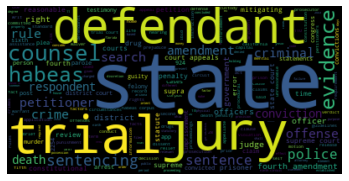

2


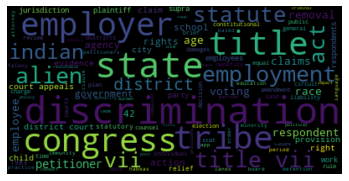

8


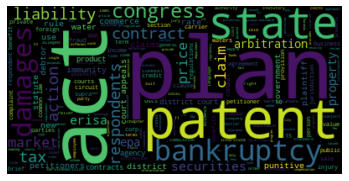

9


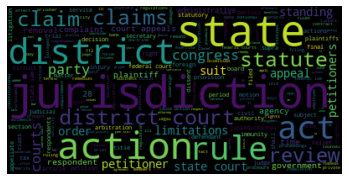

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic_id'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

**Make word cloud of common words by naive bayes topic ranking.**

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# X is the data transformed by CountVectorizer above, y are the topic_ids
print (X.shape, df['topic_id'].astype(int))
nb.fit(X.todense(), df['topic_id'].astype(int))
df["topic_id"].describe()
print (nb.coef_.shape)

(768, 1000) 0       1
1       8
2       1
4      10
5       4
       ..
815     2
816     1
817     9
818     1
819     4
Name: topic_id, Length: 768, dtype: int64
(13, 1000)


1


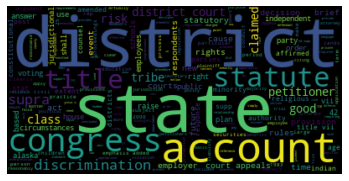

2


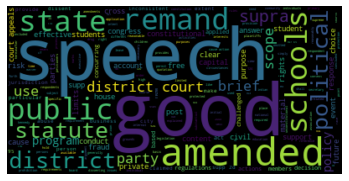

8


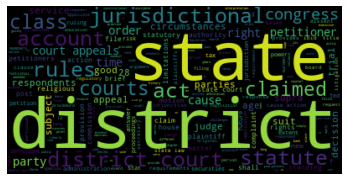

9


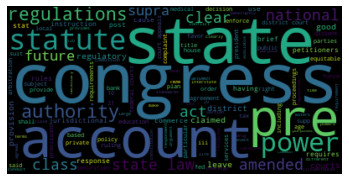

In [51]:
for topic_id in [1,2,8,9]: 
    # get feature coefficients for topic_id from naive bayes classifier
    f = nb.coef_[topic_id]
    fdict = dict(zip(vocab,f))
    # generate word cloud of words with highest feature coefficients
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

**customer tokenizers and stemmers**

In [52]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10) # faster, save more storage etc.
X_hash = hv.fit_transform(df['opinion_text']) # However, you cannot recover original words from hashed features
X_hash

<768x10 sparse matrix of type '<class 'numpy.float64'>'
	with 7680 stored elements in Compressed Sparse Row format>

In [ ]:
# dict vectorizer
# from sklearn.feature_extraction import DictVectorizer
#TODO make this work
#dv = DictVectorizer()
#X_dv = dv.fit_transform(df['opinion_text'])
#X_dv

**debugging hashing vectorizer**

In [55]:
# !pip install eli5
from eli5.sklearn import InvertableHashingVectorizer

ivec = InvertableHashingVectorizer(hv)
inverted_hv = ivec.fit(df['opinion_text'])
print ([i for i in inverted_hv.get_feature_names()])

[[{'name': 'with', 'sign': -1.0}, {'name': 'has', 'sign': -1.0}, {'name': 'united', 'sign': 1.0}, {'name': 'if', 'sign': 1.0}, {'name': 'other', 'sign': -1.0}, {'name': 'whether', 'sign': -1.0}, {'name': 'because', 'sign': 1.0}, {'name': 'when', 'sign': 1.0}, {'name': 'supra', 'sign': 1.0}, {'name': 'against', 'sign': 1.0}, {'name': 'claims', 'sign': -1.0}, {'name': 'before', 'sign': -1.0}, {'name': 'use', 'sign': 1.0}, {'name': 'justice', 'sign': 1.0}, {'name': 'rights', 'sign': -1.0}, {'name': 'authority', 'sign': 1.0}, {'name': 'fact', 'sign': 1.0}, {'name': 'reasonable', 'sign': -1.0}, {'name': 'property', 'sign': 1.0}, {'name': 'plan', 'sign': 1.0}, {'name': 'further', 'sign': 1.0}, {'name': 'supp', 'sign': -1.0}, {'name': 'tax', 'sign': -1.0}, {'name': 'required', 'sign': 1.0}, {'name': 'proceedings', 'sign': -1.0}, {'name': 'rather', 'sign': 1.0}, {'name': 'him', 'sign': -1.0}, {'name': 'appeal', 'sign': 1.0}, {'name': 'language', 'sign': 1.0}, {'name': 'used', 'sign': 1.0}, {'n

**hashing with keras**

In [56]:
# !pip install keras
import tensorflow as tf
import keras
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."
n = 5 # num features
tf.keras.preprocessing.text.hashing_trick(
    text, n, hash_function=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' '
)

[4, 3, 2, 1, 3, 3, 3, 4, 2, 4, 1, 1, 4]

**Collocations: Point-Wise Mutual Information.**

In [61]:
from operator import mul
from functools import reduce
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def get_gmean(phrase, termfreqs):
    words = phrase.split('_')
    n = len(words)
    p = [termfreqs[w]**(1/n) for w in words]
    # print (words, n, p)
    numerator = termfreqs[phrase]   
    denominator = reduce(mul, p)
    # print (numerator, denominator)
    if denominator == 0:
        return 0
    gmean = numerator / denominator
    return gmean

**POS-filtered N-grams**

In [13]:
from collections import Counter

# Normalized Penn tags
tagdict = { 'NN':'N',
            'NNS':'N',
                                    
            'JJ':'A',
            'JJR':'A',
            'JJS':'A',
            'VBG':'A', # gerunds/participles treated like adjectives

            'RB':'A', # adverbs treated as adjectives
            'RBR':'A',
            'RBS':'A',
            'PDT':'A', # predeterminer            

            'VB':'V',
            'VBD':'V',
            'VBN':'V',
            'VBP':'V',
            'VBZ':'V',
            'MD': 'V', # modals treated as verbs
            'RP': 'V', # particles treated as verbs
            
            'DT':'D',
                        
            'IN':'P',
            'TO':'P',

            'CC': 'C'}

tagpatterns = {'A','N','V','P','C','D',
           'AN','NN', 'VN', 'VV', 
            #'NV',
            'VP',                                    
            'NNN','AAN','ANN','NAN','NPN',
            'VAN','VNN', 'AVN', 'VVN',
            'VPN', 'VDN', 
            #'ANV','NVV','VVV', 'NNV',
            'VVP','VAV','VVN',
            'NCN','VCV', 'ACA',  
            'PAN',
            'NCVN','ANNN','NNNN','NPNN', 'AANN' 'ANNN','ANPN','NNPN','NPAN', 
            'ACAN', 'NCNN', 'NNCN', 'ANCN', 'NCAN',
            'PDAN', 'PNPN',
            'VDNN', 'VDAN','VVDN'}

def count_pos_grams(sentence, max_phrase_length=4):
    sent_freq = Counter()
    tagwords = []
    for (word,tag) in tagger.tag(sentence):
        if tag in tagdict:
            normtag = tagdict[tag]
            stemmed = word.lower()#stemmer.stem(word)
            tagwords.append((stemmed,normtag))
        else:
            tagwords.append(None)
    for n in range(1,max_phrase_length+1):            
        rawgrams = ngrams(tagwords,n)
        for rawgram in rawgrams:
            # skip grams that have rare words
            
            if None in rawgram:
                continue
            gramtags = ''.join([x[1][0] for x in rawgram])
            if gramtags in tagpatterns:
                 # if tag sequence is allowed, add to counter
                gram = '_'.join([x[0] for x in rawgram])
                sent_freq[gram] += 1
    return sent_freq

In [58]:
max_phrase_length = 4
termfreqs = Counter()

for i, doc in dfs.iterrows():    
    termfreqs.update(count_pos_grams(nltk.word_tokenize(doc['opinion_text'])))
        


In [62]:
# filter out unigrams
grams = [x for x in termfreqs.most_common() if '_' in x[0]]
# make dataframe of geometric mean associations for each gram
gmeans = pd.DataFrame([(gram[0], get_gmean(gram[0],termfreqs)) for gram in grams],
              columns=['ngram','gmean'])
gmeans.sort_values('gmean',ascending=False)

,ngram,gmean
4941,bikini_top.1the,1.000000
4457,rapid_pace,1.000000
5107,opening_engagement,1.000000
5067,real-world_outcome,1.000000
2111,long-term_leases,1.000000
...,...,...
6991,have_to,0.002567
5880,be_that,0.002355
3909,be_the_case,0.002351
3849,is_the_agency,0.001879


CountVectorizer can be run directly on tokens so you can run it on the phrased documents, for example.

In [63]:
token_vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                            max_df=.9,  # no tokens appearing in more than 90% of all docs
                            max_features=10000,                                                
                            preprocessor =lambda x: x, # for tokens
                            tokenizer = lambda x: x, # for tokens
                            stop_words='english',
                            ngram_range=(1,1))
#print (df["tokens_cleaned"][0])
#print (df["opinion_text"][0])
#print (df.columns)
X_pos = vec.fit_transform(df['opinion_text'])
X_pos

<768x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 301699 stored elements in Compressed Sparse Row format>

**spacy**

In [64]:
# spacy noun chunks for the first document
i = 0
for chunk in nlp(dfs.iloc[0]['opinion_text']).noun_chunks:
    print ('{} - {}'.format(chunk, chunk.label_))
    if i > 10:
        break
    i += 1

Chief Justice Roberts - NP
the opinion - NP
the Court - NP
The Railroad Revitalization - NP
Regulatory Reform Act - NP
States - NP
railroads - NP
railroad property - NP
other commercial property - NP
the State - NP
we - NP
this statute - NP


In [66]:
# spacy prepositional phrase chunking
# find all PPs (e.g. "in the court")
def get_pps(text):
    pps = []
    doc = nlp(text)
    for token in doc:
        # if we have a prepositional object and the dependency head of the current token is a preposition, we have a prepositional phrase
        if token.dep_ == "pobj" and token.head.dep_ == "prep":
            # we just iterate through the subtree then and collect the dependency head, the token itself and all tokens in the subtree
            pp = token.head.text + " " + ' '.join([tok.orth_ for tok in token.subtree])
            pps.append(pp)
    return pps
            
pps = get_pps(df["opinion_text"][0])
pps[:10]

['of the Court',
 'by a federal prisoner for postconviction relief under 28 U.S.C. § 2255',
 'for postconviction relief',
 'under 28 U.S.C. § 2255',
 'to a one - year time limitation that generally runs from " the date on which the judgment of conviction becomes final',
 'from the date on which the judgment of conviction becomes final',
 'on which',
 'of conviction',
 'for the one - year limitation',
 'on which']

In [67]:
# spacy named entities
i = 0
for entity in nlp(dfs.iloc[0]['opinion_text']).ents:
    print ('{} - {}'.format(entity, entity.label_))
    if i > 10:
        break
    i += 1


Roberts - PERSON
Court - ORG
1976 - DATE
State - ORG
Two decades ago - DATE
State - ORG
Burlington Northern R. Co. - ORG
Oklahoma Tax Comm'n - ORG
481 - CARDINAL
U.S. - GPE
454 - CARDINAL
462 - CARDINAL


# Feature Selection

In [68]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['cite_count']
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
vocab = vec.get_feature_names()
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['granted certiorari',
 'judgment court appeals',
 'judgment court',
 'reversed',
 'remanded',
 'affirmed',
 'agree',
 'turn',
 'contrast',
 'hold']

In [69]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['924',
 'elements',
 'nation',
 'carrier',
 'good',
 'primary',
 'rates',
 'element',
 'cost',
 '36']

In [ ]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['limitations',
 'charge',
 '177',
 '92',
 'included',
 '____',
 '108',
 'injunction',
 'code',
 'days']

In [ ]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['fda',
 'erisa',
 'epa',
 'banks',
 'debtor',
 'candidate',
 'districts',
 'arbitration',
 'voting',
 'minority']

In [ ]:
###
# OLS Regression
###

# list of words from our vectorizer
#vocab = [w.replace(' ', '_') for w in vocab]
         
# convert frequency counts to dataframe
#df4 = pd.DataFrame(X.todense(),
#                   columns=vocab)

# import statsmodels package for R-like regression formulas
#import statsmodels.formula.api as smf

# add metadata
#df4['Y'] = df['log_cite_count'] # cites to this opinion
#df4['judgefe'] = df['authorship']   # judge fixed effect
#df4['yearfe'] = pd.to_datetime(df['date_standard']).dt.year        # year fixed effect

In [ ]:
# empty lists for t-statistics and coefficients
#tstats, betas = [], []

#for xvar in vocab: # loop through the words in vocab
#    if any([c.isdigit() for c in xvar]) or 'hellip' in xvar:
#        tstats.append(0)
#        betas.append(0)
#        continue
#    model = smf.ols('Y ~ %s' % xvar,data=df4)                
#    result = model.fit() 
#    tstats.append(result.tvalues[1])
#    betas.append(result.params[1])
            
# zip up words and t-statistics
#stats = list(zip(vocab,tstats))
#stats.sort(key = lambda x: x[1], reverse=True) # sort by second item (tstats)
#stats[:10] + stats[-10:]

# Sentencepiece Tokenization

In [ ]:
!pip install sentencepiece
# https://github.com/google/sentencepiece
import sentencepiece as spm
# training spm requires a text file as input, so generate a small one
with open("sample_text.txt", "w") as outfile:
        for text in df["opinion_text"][:100]:
            outfile.write(text + "\n")
            
spm.SentencePieceTrainer.train(input="sample_text.txt", model_prefix='m', vocab_size=100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00


In [ ]:
df["opinion_text"][0][:100]

'JUSTICE GINSBURG delivered the opinion of the Court.\n\n A motion by a federal prisoner for postconvic'

In [ ]:
# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')
sp.encode_as_pieces(df["opinion_text"][0][:100])

['▁',
 'J',
 'U',
 'S',
 'T',
 'I',
 'C',
 'E',
 '▁',
 'G',
 'I',
 'N',
 'S',
 'B',
 'U',
 'R',
 'G',
 '▁',
 'd',
 'e',
 'l',
 'i',
 'v',
 'er',
 'ed',
 '▁the',
 '▁',
 'o',
 'p',
 'in',
 'i',
 'on',
 '▁of',
 '▁the',
 '▁',
 'C',
 'o',
 'u',
 'r',
 't',
 '.',
 '▁',
 'A',
 '▁',
 'm',
 'o',
 'tion',
 '▁',
 'b',
 'y',
 '▁a',
 '▁',
 'f',
 'ed',
 'er',
 'al',
 '▁',
 'p',
 'r',
 'is',
 'on',
 'er',
 '▁',
 'f',
 'or',
 '▁',
 'p',
 'o',
 's',
 't',
 'c',
 'on',
 'v',
 'i',
 'c']

In [ ]:
print(sp.encode_as_ids(df["opinion_text"][0][:100]))

[3, 94, 71, 69, 78, 67, 40, 68, 3, 93, 67, 89, 69, 75, 71, 80, 93, 3, 9, 4, 12, 7, 28, 21, 34, 20, 3, 11, 18, 45, 7, 31, 35, 20, 3, 40, 11, 10, 15, 5, 13, 3, 60, 3, 16, 11, 39, 3, 25, 22, 32, 3, 24, 34, 21, 38, 3, 18, 15, 37, 31, 21, 3, 24, 41, 3, 18, 11, 6, 5, 14, 31, 28, 7, 14]


**[Huggingface tokenizers](https://huggingface.co/transformers/main_classes/tokenizer.html)**

Huggingface is a very nice library built around transformers and allows us to do pretty much anything with it. All different models consist of model parameters, model code (e.g., different attention mechanisms) and a unique tokenizer. We will re-visit huggingface later in this class, but give an intro for wordpiece tokenization using huggingface in the following section.

We can instantiate models and tokenizers by passing a string to the method "from_pretrained". The string is either the path to a downloaded model or a model id matching with one of the [pre-trained models available](https://huggingface.co/transformers/pretrained_models.html) which we then download. In this exercise, we use the  [DistilBERT](https://arxiv.org/abs/1910.01108) tokenizer.

In [71]:
# we use distilbert tokenizer
# !pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# tokenize text
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."
tokenizer.tokenize(text) #word pieces start with ##..., e.g. ETH is split into et ##h (obtained by BPE (Byte Pair Encoding))

['prof',
 '.',
 'zurich',
 'hailed',
 'from',
 'zurich',
 '.',
 'she',
 'got',
 '3',
 'm',
 '.',
 'a',
 '.',
 "'",
 's',
 'from',
 'et',
 '##h',
 '.']

In [ ]:
# tokenizers are callable and will transform raw text input to the model input (e.g. input_ids, attention_mask, token_segment_ids)
model_inputs = tokenizer(text)
model_inputs

{'input_ids': [101, 11268, 1012, 10204, 16586, 2013, 10204, 1012, 2016, 2288, 1017, 1049, 1012, 1037, 1012, 1005, 1055, 2013, 3802, 2232, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
# and we can then decode input_ids back to text
tokenizer.decode(model_inputs["input_ids"]) 
# note how we added two special tokens to the input, the [CLS] and [SEP] tokens
# this will be important later

"[CLS] prof. zurich hailed from zurich. she got 3 m. a.'s from eth. [SEP]"

# Parsing

## Setup

In [73]:
# !pip install benepar
# !pip install svgling
# !pip install fastcoref
from fastcoref import spacy_component # a SOTA coreference resolution package, see https://arxiv.org/pdf/2209.04280.pdf
import spacy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving death-penalty-cases.csv to death-penalty-cases.csv


In [ ]:
#setup
%matplotlib notebook
import pandas as pd
from spacy import displacy
import benepar
import nltk

from collections import Counter


df = pd.read_csv('death-penalty-cases.csv')

In [ ]:
df

,court_id,author_id,state,year,dateFiled,citeCount,snippet
0,nj,NaN,NJ,1965,1965-09-14T00:00:00Z,8,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...
1,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconsti..."
2,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,# ;s contention that the assessment of the dea...
3,nm,NaN,NM,2009,2009-11-30T00:00:00Z,0,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...
4,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,assume the district attorney orally waived the...
...,...,...,...,...,...,...,...
32562,ohioctapp,8055.0,OH,2017,2017-07-20T00:00:00Z,0,of two counts of aggravated murder with deat...
32563,cal,NaN,CA,2017,2017-07-20T00:00:00Z,0,his general views about the death penalty as ...
32564,neb,NaN,NE,2017,2017-07-21T00:00:00Z,0,"been subject to the death\npenalty, because Ne..."
32565,ohio,5374.0,OH,2017,2017-07-25T00:00:00Z,0,that Indiana law permits imposition of the de...


## Dependency Parsing with SpaCy

Let's first look at one example:

In [ ]:
text = 'Science cannot solve the ultimate mystery of nature.'
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [ ]:
displacy.render(doc, style="dep", jupyter=True)

In [ ]:
for sent in doc.sents:
    print("sentence:", sent)
    print("root:", sent.root)
    print([(w, w.dep_) for w in sent.root.children])
    print()

sentence: Science cannot solve the ultimate mystery of nature.
root: solve
[(Science, 'nsubj'), (can, 'aux'), (not, 'neg'), (mystery, 'dobj'), (., 'punct')]



In [ ]:
# current sentence
print(sent)
print(sent.root)
print(list(sent.root.children))
# Left children
print(list(sent.root.lefts))
# Right children
print(list(sent.root.rights))
# first token
print(sent[0])
# first token dependency label, cc=conjunction
print(sent[0].dep_)
print(sent[0].head)

Science cannot solve the ultimate mystery of nature.
solve
[Science, can, not, mystery, .]
[Science, can, not]
[mystery, .]
Science
nsubj
solve


# Constituency Parsing with SpaCy

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


(S (NP (NN Science)) (VP (MD can) (RB not) (VP (VB solve) (NP (NP (DT the) (JJ ultimate) (NN mystery)) (PP (IN of) (NP (NN nature)))))) (. .))
('S',)
Science


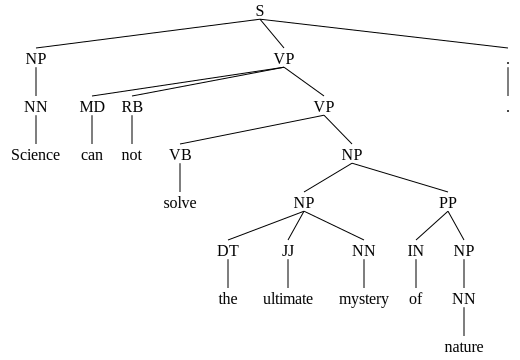

In [ ]:
import nltk
benepar.download('benepar_en3')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})
doc = nlp('Science cannot solve the ultimate mystery of nature.')
sent = list(doc.sents)[0]
print(sent._.parse_string)
print(sent._.labels)
print(list(sent._.children)[0])
nltk.Tree.fromstring(sent._.parse_string)

# Application
## Unsupervised Discovery of Gendered Language through Latent-Variable Modeling

[Hoyle et al. (2019)](https://www.aclweb.org/anthology/P19-1167/) study the language use of gendered nouns and proceed to train a generative latent-variable model that jointly represents adjective (or verb) choice, with its sentiment given the (natural) gender of a noun. To this extent, they extract noun–adjectives pairs, NSUBJ–verb pairs and DOBJ–verb pairs. 

In the following, we show how to extract NSUBJ-verb pairs from text.

In [ ]:
df

,court_id,author_id,state,year,dateFiled,citeCount,snippet
0,nj,NaN,NJ,1965,1965-09-14T00:00:00Z,8,N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PE...
1,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconsti..."
2,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,# ;s contention that the assessment of the dea...
3,nm,NaN,NM,2009,2009-11-30T00:00:00Z,0,. d ( )\n -NMSC- \nIN THE MATTER OF DEATH PE...
4,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,assume the district attorney orally waived the...
...,...,...,...,...,...,...,...
32562,ohioctapp,8055.0,OH,2017,2017-07-20T00:00:00Z,0,of two counts of aggravated murder with deat...
32563,cal,NaN,CA,2017,2017-07-20T00:00:00Z,0,his general views about the death penalty as ...
32564,neb,NaN,NE,2017,2017-07-21T00:00:00Z,0,"been subject to the death\npenalty, because Ne..."
32565,ohio,5374.0,OH,2017,2017-07-25T00:00:00Z,0,that Indiana law permits imposition of the de...


In [ ]:
df = df.sample(n=200)
df["processed"] = df["snippet"].apply(lambda x: nlp(x)) # takes many time so we sample 200 data points


In [ ]:

def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs

df["subj-verb-pairs"] = df["processed"].apply(lambda x: extract_subject_verb_pairs(x))

In [ ]:
# most common pairs
counter = Counter()
for item in df["subj-verb-pairs"]:
    counter.update(item)
    
for pair, counts in counter.most_common(n=25):
    print (pair, counts)

('penalty', 'be') 19
('state', 'seek') 14
('he', 'be') 8
('it', 'be') 7
('statute', 'be') 7
('defendant', 'be') 6
('this', 'be') 5
('scheme', 'be') 4
('jury', 'find') 4
('that', 'be') 4
('decision', 'be') 4
('who', 'express') 4
('which', 'be') 3
('they', 'be') 3
('who', 'state') 3
('imposition', 'be') 3
('court', 'have') 3
('court', 'hold') 3
('defendant', 'contend') 3
('we', 'consider') 3
('case', 'be') 3
('he', 'argue') 3
('defendant', 'have') 3
('we', 'find') 3
('scruple', 'be') 3


In [ ]:
nlp.add_pipe("fastcoref")
# to load a more accurate model:
# nlp.add_pipe("fastcoref", config={'model_architecture': 'LingMessCoref', 'model_path': 'biu-nlp/lingmess-coref', 'device': 'cpu'})

In [ ]:
# Coreference Resolution
example = 'My sister has a dog. She loves him.'
doc = nlp(example)
print(doc._.coref_clusters)   
resolved_corefs = [[example[t[0]:t[1]] for t in c] for c in doc._.coref_clusters]
print(resolved_corefs)
# directly load resolved texts
docs = nlp.pipe(
   ['My sister has a dog. She loves him.'], 
   component_cfg={"fastcoref": {'resolve_text': True}}
)
print(list(docs)[0]._.resolved_text)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

[[(14, 19), (31, 34)]]
[['a dog', 'him']]


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

My sister has a dog. She loves a dog.


In [ ]:
docs = nlp.pipe(
    df["snippet"],
    component_cfg={"fastcoref": {'resolve_text': True}}
)
df["resolved_texts"] = [doc._.resolved_text for doc in docs]
# df["resolved_texts"] = df["snippet"].apply(lambda x: nlp(x))


/usr/local/lib/python3.8/dist-packages/torch/distributions/distribution.py:45: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Inference:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
nlp = spacy.load('en_core_web_sm')
# nlp.add_pipe('benepar', config={'model': 'benepar_en3'})

df["resolved_processed"] = df["resolved_texts"].apply(lambda x: nlp(x))

In [ ]:
df["resovled_subj-verb-pairs"] = df["resolved_processed"].apply(lambda x: extract_subject_verb_pairs(x))
# most common pairs
counter = Counter()
for item in df["resovled_subj-verb-pairs"]:
    counter.update(item)
    
for pair, counts in counter.most_common(n=25):
    print (pair, counts)

('penalty', 'be') 19
('state', 'seek') 14
('statute', 'be') 7
('scheme', 'be') 5
('who', 'state') 5
('defendant', 'be') 5
('it', 'be') 5
('case', 'be') 5
('court', 'impose') 5
('which', 'be') 4
('jury', 'find') 4
('he', 'be') 4
('this', 'be') 4
('decision', 'be') 4
('who', 'express') 4
('scruple', 'be') 4
('thomas', 'be') 4
('imposition', 'be') 3
('court', 'have') 3
('court', 'hold') 3
('defendant', 'contend') 3
('we', 'consider') 3
('that', 'be') 3
('defendant', 'have') 3
('we', 'find') 3


In [ ]:
# verbs used with defendant

for (subject, verb), counts in counter.most_common():
    if subject == "defendant" and counts > 1:
        print (subject, verb, counts)

defendant be 5
defendant contend 3
defendant have 3


In [ ]:
# verbs used with jury

for (subject, verb), counts in counter.most_common():
    if subject == "jury" and counts > 1:
        print (subject, verb, counts)

jury find 4
jury impose 2
jury assess 2
